In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Download dataset of amazon stock prices from yahoo finance
#ticks=["AMZN"]
#df=yf.download(ticks, start="2018-03-04",end="2023-02-18")
#df.to_csv("amazon_stock_prices.csv")

[*********************100%***********************]  1 of 1 completed


In [2]:
data=pd.read_csv("amazon_Stock_prices.csv",parse_dates=['Date'],index_col=[0])
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-05,74.711998,76.268997,74.050003,76.180496,76.180496,104678000
2018-03-06,76.660004,77.106499,76.400002,76.882004,76.882004,91234000
2018-03-07,76.325996,77.294998,76.125504,77.250000,77.250000,83482000
2018-03-08,77.500000,77.744003,77.262497,77.593002,77.593002,77252000
2018-03-09,78.175003,78.946999,77.954002,78.944504,78.944504,90686000
...,...,...,...,...,...,...
2023-02-13,97.849998,99.680000,96.910004,99.540001,99.540001,52841500
2023-02-14,98.410004,100.919998,97.519997,99.699997,99.699997,56202900
2023-02-15,99.089996,101.169998,98.449997,101.160004,101.160004,48053900


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03
mean,120.993706,122.460229,119.363473,120.921008,120.921008,8.527751e+07
std,34.730022,35.093681,34.316509,34.663524,34.663524,3.958156e+07
min,67.300003,69.801498,65.349998,67.197998,67.197998,1.762600e+07
25%,89.912750,90.755999,88.881500,89.859749,89.859749,5.861750e+07
50%,108.425499,111.954998,106.965000,108.824001,108.824001,7.412100e+07
75%,158.389877,160.050995,156.275372,158.111000,158.111000,1.006440e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


In [4]:
price=data[["Close"]]
price

,Close
Date,
2018-03-05,76.180496
2018-03-06,76.882004
2018-03-07,77.250000
2018-03-08,77.593002
2018-03-09,78.944504
...,...
2023-02-13,99.540001
2023-02-14,99.699997
2023-02-15,101.160004


In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2018-03-05 to 2023-02-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1250 non-null   float64
dtypes: float64(1)
memory usage: 19.5 KB


# Visualization

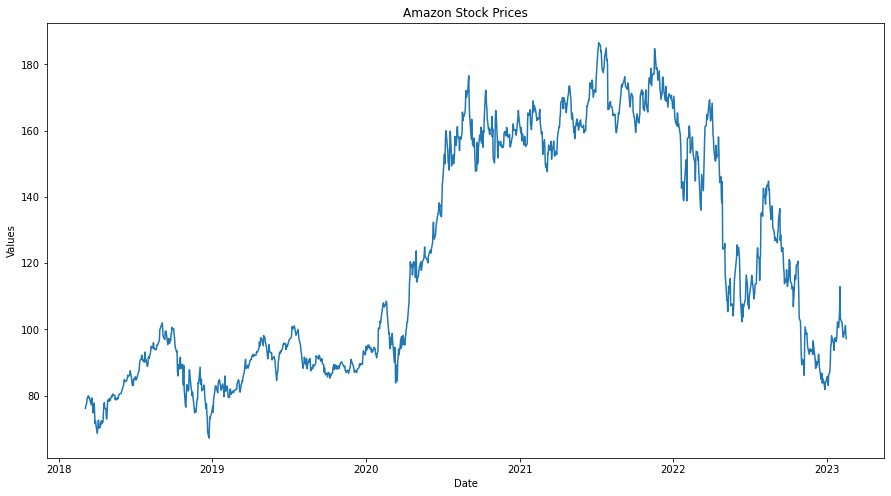

In [6]:
# setting figure size to 12, 10
plt.figure(figsize=(15, 8))

# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Amazon Stock Prices")

plt.plot(price)

Check Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    raw_results = adfuller(timeseries, autolag='AIC')
    raw_results = [x for x in raw_results[:5]]
    results = raw_results[:4]
    results.extend([raw_results[4]['1%'], raw_results[4]['5%'], raw_results[4]['10%']])
    
    df_result = pd.DataFrame({'Label':['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used', 
                                       'Critical value for 1%', 'Critical value for 5%', 'Critical value for 10%'],
             'Value':results})
    
    return df_result
check_stationarity(price)

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


,Label,Value
0,Test Statistic,-1.626682
1,p-value,0.469228
2,#Lags Used,0.000000
3,Number of Observations Used,1249.000000
4,Critical value for 1%,-3.435596
5,Critical value for 5%,-2.863857
6,Critical value for 10%,-2.568004
